# **MACHINE LEARNING E O MARKETING**

Imagine que você é dono de um comércio eletrônico e quer trabalhar em uma nova campanha de email marketing para aumentar a venda de seus produtos e consequentemente o faturamento de sua empresa. 

Geralmente neste tipo de campanha, a primeira coisa que vem à mente é que quanto mais gente seus emails atingirem, maior será seu faturamento. 

Só que nem sempre é isso o que acontece. Quando você envia emails de forma generalizada para sua base, o efeito pode ser justamente o oposto. Seus clientes podem sair da sua base de emails porque estão recebendo mensagens de assuntos que não tem interesse, por exemplo. 

Sem contar que a chance de vender um produto caro para um cliente que tem um salário baixo é extremamente baixa.

Pensando em aumentar tanto a eficiência de sua comunicação, quanto o aumento das vendas é que fiz este estudo. 

A ideia aqui é agrupar clientes por salários e níveis de gasto e com isso enviar mensagens mais acertadas para cada tipo de público. 

Para fazer este agrupamento eu utilizarei o K-Means que é um algoritmo contido na biblioteca do Scikit-Learning. 





## **O QUE É O K-MEANS**

O K-Means é um algoritmo de aprendizagem não supervisionada que não possui variável de saída vinculada a seus dados. A ideia central dele, é que você passe suas variáveis de entrada e encontre algum padrão utilizando o agrupamento de conjuntos, que é o que se chama de clustering. 

O k-Means se enquadra na categoria de agrupamentos baseado em centróides que basicamente é um ponto de dados (imaginário ou real) no centro de um cluster. 
O agrupamento baseado em centróide é um algoritmo iterativo no qual a noção de similaridade é derivado de quão próximo um ponto de dados está do centróide do cluster. 

## **SOBRE OS DADOS**

Agora que já entendemos o básico do funcionamento do algoritmo, deixa eu te explicar sobre a base de dados que será utilizada para este estudo. 

- *CustomerID* - Identificador Unico do Cliente
- *Genre* - Colune de Genero, Masculino ou Feminino
- *Age* - Idade de Cada Cliente
- *Anual Income* (k$) - Renda Anual de cada um dos Clientes
- *Spending Score* (1-100) - Classificação do Cliente de acordo com seus gastos



## **IMPORTAÇÃO DAS BIBLIOTECAS**

Como sempre, importei as bibliotecas mais utilizadas para a fase de exploração e limpeza dos dados. 
Aproveitei e já deixei o Seaborn pré-configurado para que sempre exiba o shape do gráfico através do método set() e desativei os avisos através da biblioteca Warnings. Neste caso, agora receberei apenas mensagens de erro quando estiver codificando o programa. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

## **IMPORTAÇÃO E TRATAMENTO DOS DADOS**

O próximo passo consiste na importação da minha base de dados que está no formato CSV. Para carregá-la para o programa basta chamar um método nativo do Pandas, o read_csv(). Em alguns casos, principalmente quando estamos trabalhando com dados que contem acentuação, pode ser necessário passar o encondig ou definir o limitador para que o Pandas consiga fazer a leitura de forma correta.


In [2]:
df = pd.read_csv('store.csv')

In [3]:
#Aprentemente não tenho dados faltando
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Vericcando o nome das colunas
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Feita a importação do dados, eu gosto bastante de chamar o método .info() para ter uma noção geral do estado dos dados. Com ele consigo verificar a existência de dados faltantes e também o tipo de dados contido dentro do Data Frame. 

Note que este Data Frame é bem pequeno. Temos apenas 200 alinhas e 5 colunas. Repare também que todos os dados já estão no formato correto. 

Isso é bom. Aparentemente não terei que fazer tratamento. Pelo menos olhando assim, por cima. 
Outra coisa que gosto muito de fazer para ter uma ideia geral dos dados é utilizar o método describe(). Ele é muito útil para identificar dados fora de padrão e principalmente para nos dar uma ideia geral dos limites dos dados que estamos trabalhando. 

## **ANALISE EXPLORATORIA DOS DADOS**

A primeira coisa que faço é verificar a quantidade de gêneros que estão contidos na minha base. Gosto de fazer isso porque eventualmente o desbalanceamento pode ser muito grande e dependendo do modelo, esta pode ser uma coluna a ser desconsiderada. 

Veja que temos mais clientes do sexo feminino do que do masculino em nossa base. 
Agora quero ver os ganhos anuais de ambos sexos. Para isso eu vou utilizar o “barplot” do seaborn. 
Abaixo você o código que utilizei para gerar o gráfico e na sequencia, o gráfico plotado.


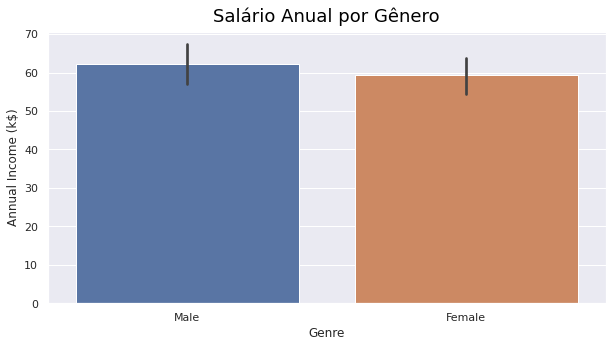

In [6]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = 'Genre', y = 'Annual Income (k$)', data = df, ax = ax)

ax.set_title('Salário Anual por Gênero',
            loc = 'center',
            fontdict = {'fontsize':18},
            color = 'black',
            pad = 10 
            )

plt.show()

Agora comparo o Score por Genêro

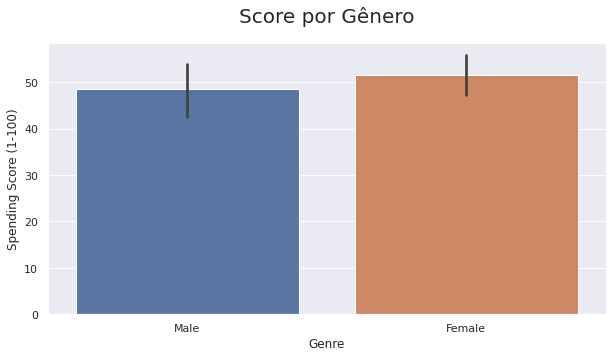

In [7]:
#Verificando os Score das mulheres e dos homens
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x ='Genre', y = 'Spending Score (1-100)', data = df, ax = ax)

ax.set_title('Score por Gênero',
            loc = 'center',
            pad = 20,
            fontdict = {'fontsize': 20})

plt.show()

In [8]:
#Explorando um pouco as diferenças entre homnes e mulheres
round(df.groupby('Genre').mean(),2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,,
Female,97.56,38.10,59.25,51.53
Male,104.24,39.81,62.23,48.51


Por ultimo, gero uma tabela com o resumo dos dados.

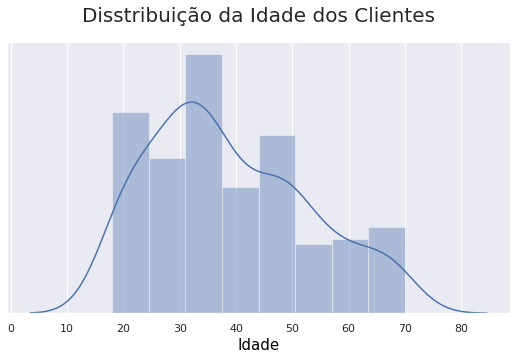

In [9]:
#Verificando a distribuição de Idade dos Clientes
fig, ax = plt.subplots(figsize = (9,5))

sns.distplot(df['Age'])

ax.set_title('Disstribuição da Idade dos Clientes',
            loc = 'center',
            pad = 20,
            fontdict ={'fontsize':20}
            )
ax.set_xlabel('Idade',
             labelpad = 5,
             fontdict={'fontsize': 15},
             color = 'black')

ax.get_yaxis().set_visible(False)


#plt.tight_layout()
plt.show()

Agora quero verificar se a idade tem alguma linearidade com os gastos. Faço isso utilizando o gráfico regplot do seaborn. 
Abaixo você vê o código que utilizei para gerar o gráfico e na sequencia o gráfico plotado.

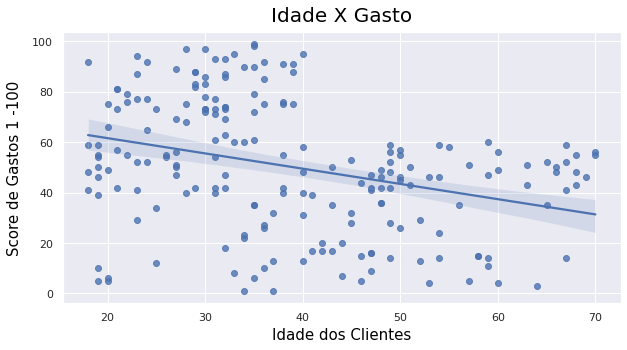

In [10]:
#Verificando se existe alguma relação entre idade e gasto
fig, ax = plt.subplots(figsize = (10,5))

sns.regplot(df['Age'], df['Spending Score (1-100)'], ax = ax)


ax.set_title('Idade X Gasto',
            loc = 'center',
            pad = 10,
            fontdict = {'fontsize': 20},
            color = 'black')

ax.set_xlabel('Idade dos Clientes',
             labelpad = 5,
             fontdict = {'fontsize': 15},
             color = 'black')

ax.set_ylabel('Score de Gastos 1 -100',
             labelpad = 10,
             fontdict = {'fontsize': 15},
             color = 'black')


plt.show()

O que podemos ver aqui é que existe uma dispersão muito grande e isso faz com que o valor da relação entre as variáveis seja pequeno. Mas de qualquer forma, eu interpretei como uma relação negativa. Aparentemente quanto maior é a idade dos clientes, menor é o valor do gasto. 


In [11]:
#Verificando a média de gastos por idade dos clientes
temp = df.groupby('Age')['Annual Income (k$)'].mean()
temp.sort_values(ascending = False).head(10)

Age
41    101.000000
32     87.181818
28     85.250000
36     81.000000
33     80.333333
56     79.000000
34     79.000000
30     76.142857
44     75.500000
38     74.500000
Name: Annual Income (k$), dtype: float64

Parto então para a comparação entre Idade e Renda. A lógica empregada foi a mesma. Utilizei o regplot do Seaborn para gerar o gráfico. 

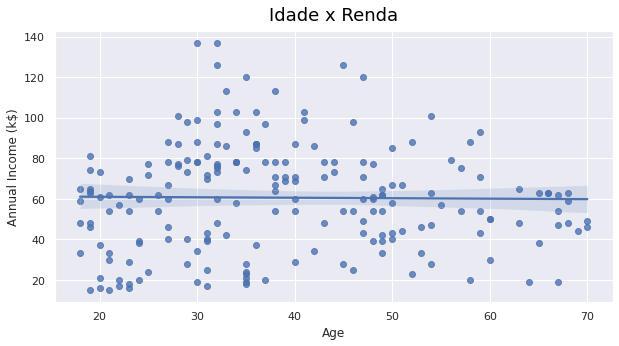

In [12]:
#Verificando Relação de Idade X Renda
fig, ax = plt.subplots(figsize = (10,5))

sns.regplot(df['Age'], df['Annual Income (k$)'], ax = ax)



ax.set_title('Idade x Renda',
            loc = 'center',
            pad = 10,
            fontdict = {'fontsize': 18},
            color = 'black')


plt.show()

Novamente, aqui temos muita dispersão e fica muito difícil estabelecer uma relação. 
Para finalizar, eu vou comparar a Renda Anual dos clientes com o Score para ver como se dá esta relação. 

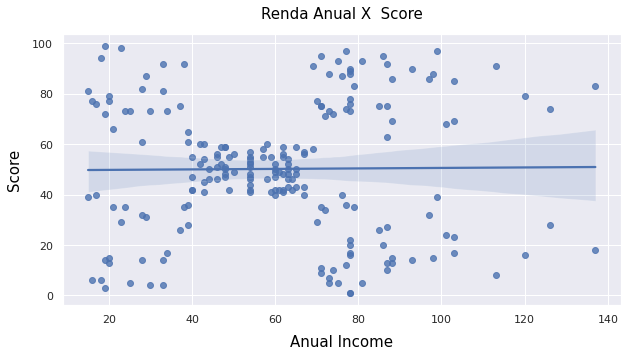

In [13]:
#Verificando a disstribuição dos dados de forma geral 
fig, ax = plt.subplots(figsize = (10,5))

sns.regplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], ax = ax)

ax.set_title('Renda Anual X  Score',
            pad = 15,
            fontdict = {'fontsize':15},
            color = 'black')

ax.set_ylabel('Score',
             labelpad = 10,
             fontdict = {'fontsize': 15},
             color = 'black')

ax.set_xlabel('Anual Income',
             labelpad = 10,
             fontdict = {'fontsize':15},
             color = 'black')


plt.show()

Veja que mais uma vez, temos uma distribuição bastante indefinidade. Porem. Visualmente, já podemos identificar a existência de alguns agrupamentos. 

Antes de aplicar o modelo eu vou definir um index para o Data Frame e na sequencia vou criar outro contendo apenas as colunas Annual Income, e Speding Score para evitar alterar os dados originais que foram manipulados até este momento. 

In [14]:
#Definindo o Cliente ID como chave Primária
df.set_index('CustomerID', inplace = True)

In [15]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [16]:
#Gerando novo DF com as colunas que serão utilizadas
df_filter = df.drop(['Genre', 'Age'], axis = 1).copy()

In [17]:
df_filter.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


## **DESENVOLVENDO O MODELO**

### **IDENTIFICANDO A QUANTIDADE DE CLUSTERS**
Existem algumas formas distintas de fazer isso. Aqui, neste estudo, eu vou fazer uso do método de Cotovelo. Ele tem esse nome estranho, mas você já vai entender o porque disso.

Para identificar qual o melhor numero de clusters passar para o modelo, eu vou começar criando uma lista que será utilizada para armazenar os resultados das iterações que farei utilizando um laço for. 

A estrategia é rodar o modelo com vários valores de n_clussters, armazenar o resultado de cada iteração dentro da lista, e por ultimo, gerar um gráfico para identificar em qual pondo tivemos menos variação do modelo. 

Na sequencia você verá o código onde utilizei um range que foi de 1 a 10. 

In [18]:
#Importando KMeans para iniciar 
from sklearn.cluster import KMeans

In [19]:
#Definindo a variável x que será utilizada pelo modelo
x = df_filter.values

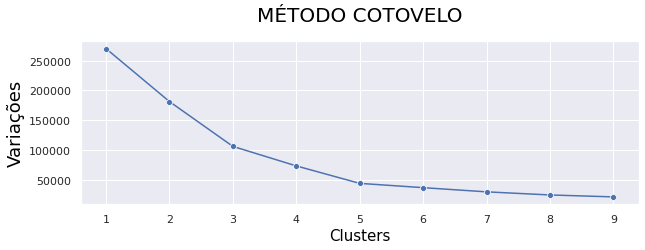

In [20]:
  
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    variacoes.append(kmeans.inertia_)


    
fig, ax = plt.subplots(figsize = (10,3))

sns.lineplot(x = range(1,10), y = variacoes, marker = 'o', ax = ax)

ax.set_title('MÉTODO COTOVELO',
             loc = 'center',
             pad = 20,
             fontdict= {'fontsize':20},
             color = 'black'
            )

ax.set_xlabel('Clusters',
              loc = 'center',
              fontdict = {'fontsize': 15},
              color = 'black'
             )

ax.set_ylabel('Variações',
             loc = 'center',
             fontdict = {'fontsize': 18},
             color = 'black'
             )

plt.show()

Aqui temos os resultados armazenados na lista variacoes plotados em um gráfico de linha. Observe que do ponto 1 para o ponto 2 temos uma variação bastante expressiva. O mesmo é válido do ponto 2 para o ponto 3. 

Ao que parece, do ponto 5 para o ponto 6 temos uma menor “perda” e isso indica que posso atribuir o valor de 5 para o n_clusters do K-Means, e é o que efetivamente eu faço.

In [21]:
#Agora que já sei a quantidade de Cluster adequada, vou trabalhar no modelo
kmeans_final = KMeans(n_clusters=5)

In [22]:
#Fitando o modelo
kmeans_final.fit(x)

KMeans(n_clusters=5)

In [23]:
#Fazendo a predição do modelo
cluster_predict = kmeans_final.predict(x)

In [24]:
#Gerando Centroide do Cluster
cluster_center = kmeans_final.cluster_centers_
cluster_center

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

Na primeira linha da imagem acima, temos o Kmeans recebendo o n_clussters que definimos com o método do cotovelo. 

Na sequencia, fitamos o modelo. Depois é feito o FIT e por ultimo, já aproveito para gerar os Centróides que serão exibidos no gráfico que será plotado a seguir. 

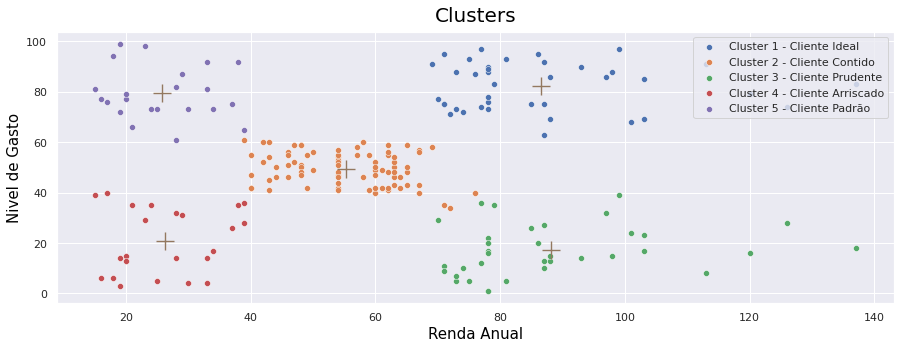

In [25]:
#Gerando Gráfico dos Clusters
fig, ax = plt.subplots(figsize = (15,5))

sns.scatterplot(x = x[cluster_predict==0, 0], y = x[cluster_predict == 0, 1], label = 'Cluster 1 - Cliente Ideal')
sns.scatterplot(x = x[cluster_predict==1, 0], y = x[cluster_predict == 1, 1], label = 'Cluster 2 - Cliente Contido')
sns.scatterplot(x = x[cluster_predict==2, 0], y = x[cluster_predict == 2, 1], label = 'Cluster 3 - Cliente Prudente')
sns.scatterplot(x = x[cluster_predict==3, 0], y = x[cluster_predict == 3, 1] ,label = 'Cluster 4 - Cliente Arriscado')
sns.scatterplot(x = x[cluster_predict==4, 0], y = x[cluster_predict == 4, 1], label = 'Cluster 5 - Cliente Padrão')

sns.scatterplot(cluster_center[:,0], cluster_center[:,1], marker = '+', s= 300)

ax.set_title('Clusters',
             loc = 'center',
             fontdict = {'fontsize': 20},
             pad = 10,
             color = 'black')
ax.set_xlabel('Renda Anual',
             fontdict = {'fontsize': 15},
             loc = 'center',
             color = 'black')
ax.set_ylabel('Nivel de Gasto',
             fontdict = {'fontsize': 15},
              loc = 'center',
              color = 'black')
plt.legend(loc = 'upper right')

plt.show()

Note que temos uma distribuição bem definida e agora fica mais fácil identificar quais clientes terão foco maior em cada tipo de campanha.

## **CONCLUSÃO**

Os métodos de Machine Learning podem ajudar em tudo o que podemos imaginar. Se você tem uma empresa de logicística e  quer aumentar a eficiência dos seus centros de distribuição, este mesmo tipo de modelo que foi demostrado neste estudo, pode ser aplicado para lhe auxiliar a identificar os melhores pontos de abertura ou locação de galpões. 

No caso do marketing, com os  recentes eventos de Covid, as estratégias digitais tornaram-se não apenas um diferencial das empresas, mas sim, algo que pode ser a diferença entre a vida e a morte de seu empreendimento. 